## Channel Imbalance and Crosstalk definition

Run cells by pressing STRG + ENTER or SHIFT + ENTER to run a cell and proceed to the next one

### Import Modules

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.linalg import cholesky

### Define some parameters

In [2]:
popsize = 100000      # Sample Size
sd = 0.013882         # a standard deviation to describe both the real and imag part (here it's just an example from one of the last distributions delivered by Airbus)
comp_corr_abs = 0.6   # amplitude of the complex correlation coefficient
comp_corr_phase = 90  # phase of the complex correlation coefficient 

### Generate data

In [3]:
# Define Covariance Matrix
cov = np.array([[sd**2,comp_corr_abs*sd**2*np.exp(1j*np.radians(comp_corr_phase))],[0,sd**2]])
# use Cholesky
chol = cholesky(cov)
randoms = np.random.randn(popsize,2) + 1j * np.random.randn(popsize,2)
samples = np.conjugate(randoms@chol).T

var1 = samples[0]
var2 = samples[1]

# get phase differences
phasediff = np.angle(var1) - np.angle(var2)
# Define the phase difference range from -pi to pi 
phasediff[phasediff>np.pi] = phasediff[phasediff>np.pi]-2*np.pi
phasediff[phasediff<-np.pi] = phasediff[phasediff<-np.pi]+2*np.pi
# Get the argument of the complex correlation coefficient from the data
phase_corr1 = np.angle(np.corrcoef(var1,var2)) 

### Plot 

<IPython.core.display.Javascript object>


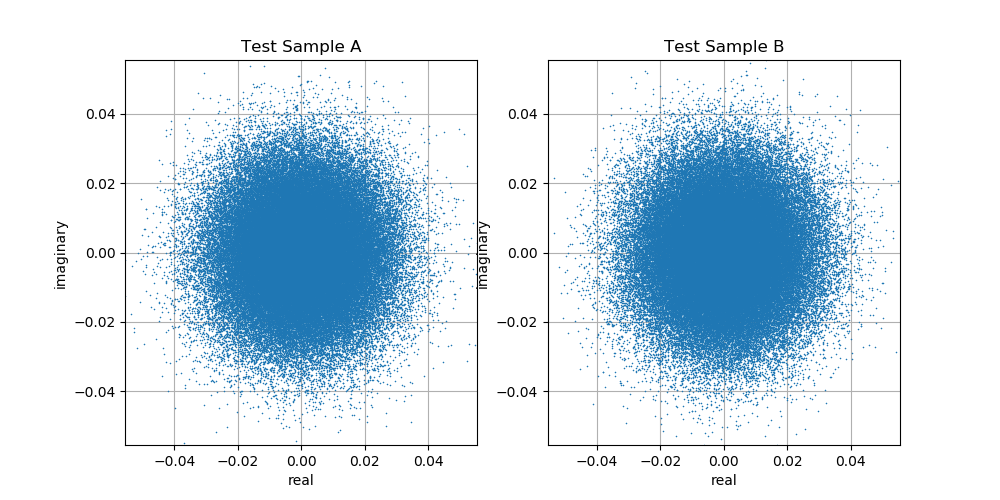

<IPython.core.display.Javascript object>


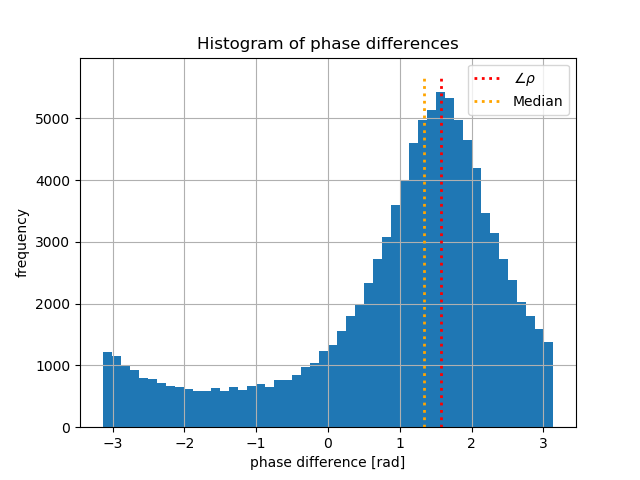

In [6]:
lim = 4*sd
fig1 = plt.figure(1, (10,5))
ax11 = fig1.add_subplot(121)
ax11.plot(np.real(var1),np.imag(var1),"x", markersize = 0.5)
ax11.set_xlim(-lim,lim)
ax11.set_ylim(-lim,lim)
ax11.grid()
ax11.set_xlabel("real")
ax11.set_ylabel("imaginary")
ax11.set_title("Test Sample A")

ax12 = fig1.add_subplot(122)
ax12.plot(np.real(var2), np.imag(var2),"x", markersize = 0.5)
ax12.set_xlim(-lim,lim)
ax12.set_ylim(-lim,lim)
ax12.grid()
ax12.set_xlabel("real")
ax12.set_ylabel("imaginary")
ax12.set_title("Test Sample B")

fig2 = plt.figure(2)
ax21 = fig2.add_subplot(111)
ax21.grid()
ax21.hist(phasediff,50)
ax21.set_xlabel("phase difference [rad]")
ax21.set_ylabel("frequency")
ax21.set_title("Histogram of phase differences")
low,high = plt.ylim()
ax21.plot([phase_corr1[0,1],phase_corr1[0,1]],[low,high],color = "red", linestyle = "dotted", linewidth = 2, label = "$\\angle$$\\rho$")
ax21.plot([np.median(phasediff),np.median(phasediff)],[low,high],color = "orange", linestyle = "dotted", linewidth = 2, label = "Median")
plt.legend()